In [2]:
import mst as mst
import mst_fair_greedy as fairMST
import mst_fair_optimal as fairMSTOpt
import numpy as np
from mbi import FactoredInference, Dataset, Domain
import scipy
import scipy.stats as stats
from disjoint_set import DisjointSet
import networkx as nx
import itertools
from cdp2adp import cdp_rho
from scipy.special import logsumexp
import argparse
import heapq
import seaborn as sns
import matplotlib.ticker as mtick
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
import pandas as pd
import copy
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [3]:
artifactspath = "vis/timing/"

In [10]:
#from the data generation file which I took directly 
fair_greedy_adult_times10= [212.39918466499967, 197.8623674800001, 191.32921687299995, 201.1442108350002, 193.23384540899997, 211.17635349600005, 183.79868317499995, 190.95482658300034, 174.89360575799992, 217.21736015500028]

fair_greedy_adult_times1= [213.80042834899996, 195.72985860100016, 163.98932678999972, 173.62428774599994, 167.13612769199972, 174.79143019999992, 170.36452583400023, 178.19464891799998, 184.05615884300005, 166.54191918800007]

fair_greedy_adult_times01= [230.13836387900028, 227.0165357779997, 245.85672224399968, 241.758930512, 250.3604582730004, 223.8691247860006, 225.15802639499998, 237.54128124, 246.6268733299994, 249.30580612000085]


fair_greedy_adult_times100= [306.4823575900009, 164.5033842089997, 159.49412701599977, 157.80584821400043, 155.36938416500016, 154.47040704000028, 154.3644473530003, 154.479138228, 196.55185694099964, 180.52453599099863]


fair_greedy_adult_times1000= [183.50408650899953, 175.822150598, 166.1314558539998, 171.47190003300057, 164.1450147530013, 167.235414286999, 171.44589917600024, 163.32023173800007, 143.2588310400006, 142.38663801099938]


mst_adult_times10 = [145.80017850900003, 139.69550369099852, 149.21022252799958, 161.15337991700108, 171.58620065300056, 153.44104480499846, 174.44673466200038, 181.84304023799996, 161.9469233689997, 195.97609018899857]

mst_adult_times1 = [188.2113847090004, 198.02416013000038, 205.9857278089985, 207.9048749859994, 212.3861125809999, 212.52139032100058, 211.42588652000086, 162.1246642089991, 153.05837820399938, 172.73556160800035]

mst_adult_times01 = [147.7736806720004, 135.047024427, 141.93845520099967, 139.58362263900017, 122.94265923700004, 130.26025700600076, 122.37749179200182, 123.74661494500106, 137.2774541530016, 135.90771430699897]

mst_adult_times100 = [136.79602197699933, 140.61315133000244, 146.17913709300046, 141.9014242589983, 142.00703877400156, 159.46221452600003, 152.9059304600014, 144.18336160200124, 140.46153624499857, 143.26188585899945]

mst_adult_times1000 = [156.92372260100092, 160.14496154399967, 164.9611748520001, 149.8228728819995, 140.1212448869992, 156.5109765519992, 156.8525612980011, 134.39008572200328, 134.67402931900142, 171.3021954750002]


fair_opt_adult_times10= [364.392184947, 350.69011776300005, 351.431450637, 350.02349901499997, 348.5643997719999, 354.495522831, 349.24960375599994, 353.52176839899994, 348.85698521400036, 353.8694545070002]

fair_opt_adult_times1= [641.1338809669996, 8687.562606071999, 726.8615125209999, 735.2726047439992, 507.31379485099933, 1146.1574729270014, 926.5620283650005, 321.7229800940004, 539.990770280001, 702.3433852269991]

fair_opt_adult_times100= [7425.523065003, 6122.765789476, 448.4830102529995, 7815.752163006, 443.2091261429996, 417.83751367700097, 442.09474955100086, 418.3847146629996, 432.30730597500224, 454.39109104300223]

fair_opt_adult_times01= [339.450682611, 585.963610517, 276.90973247199986, 1298.294222519, 2056.727351571, 324.88087384400023, 1547.8208502610005, 389.5506675300003, 6285.104720495, 337.08974024300005]


fair_opt_adult_times1000= [7239.554357645, 6681.197999788999, 7216.667339653,6535.371453287, 6878.167734822, 6958.226875768001,6637.577593938, 6813.157968849, 6797.356252063,6886.442312453,]


privbayes_times_10 = [709.1196924240003, 552.8267354289997, 635.2578249819999, 487.66905089500005, 571.2252423820005, 701.8194232989999, 559.1132342890005, 650.6617965179994, 723.3966087499994, 478.0632027439997]

privbayes_times_1 = [403.147964023, 414.11422147199994, 475.91907266399994, 368.26080932399987, 612.595638284, 578.6659734749996, 576.2117977170001, 350.0807570840002, 351.50060758499967, 588.4299071820005]

privbayes_times_01 =[434.9047455179998, 402.2502632779997, 745.6433521700001, 376.6989747300004, 461.21784439600015, 651.7838081740001, 468.3222405410006, 446.15995398700034, 428.8393825229996, 672.666025647999]

privbayes_times_100 =[552.4277643709993, 351.71780579500046, 396.8121602050014, 464.02826633899895, 552.5335560849999, 377.3097430430007, 468.7433697029992, 416.37947899199935, 477.33529816699956, 444.03767413400055]

privbayes_times_1000 = [401.0636971189997, 523.9745349959994, 614.3947924630011, 558.0282866090001, 542.3041621699995, 492.80772217900085, 575.026929366999, 370.7590321150019, 553.141534937, 514.9456108230006]

fair_privbayes_times_10 =  [417.719469507, 439.99911159500004, 408.8552680769999, 410.441795187, 445.284023701, 442.7256289789998, 441.88617572600015, 395.01128898800016, 417.68447277199994, 442.96631570499994]

fair_privbayes_times_1 = [425.285221053, 409.900992676, 437.51089728399984, 423.9541476919994, 421.4323956010003, 449.6144135200002, 419.99688412399973, 429.90856550599983, 434.94164325600104, 407.5774210180007]

fair_privbayes_times_01 = [444.5952425230007, 409.52220910899996, 448.5093627789993, 442.3900634719994, 445.06131299900153, 418.35789415100044, 438.9764095900009, 406.09443238699896, 435.6718823560004, 417.799232768999]

fair_privbayes_times_100 = [415.3176372559992, 417.28925964299924, 414.8009967449998, 411.70426654400035, 409.92194801000005, 442.5028995199991, 433.5300038330006, 398.2480016259997, 423.21367890500005, 407.65605854800015]

fair_privbayes_times_1000 = [429.6108990959983, 439.370820418997, 420.668604759001, 447.3623400539982, 406.90775563499847, 441.50370269700215, 401.63011164899945, 425.3974930160002, 429.35896689400033, 432.0278655840011]

fair_greedy_adult_times_KDD1= [418.1049694559915, 434.814901567006, 440.23468023400346, 456.74184287500975, 445.13064547900285, 451.9480824830098, 453.9571228910063, 444.496403637997, 446.2246601700026, 449.8132188430027]

mst_adult_times_KDD1 = [470.9472916969971, 484.9027877660119, 493.82846953201806, 472.50624610399245, 482.53425256398623, 480.05761338199954, 484.9207532389846, 478.337113918009, 493.2337973669928, 442.34391242900165]

fair_greedy_adult_times_compas1= [71.89930995099712, 77.61293670296436, 75.01399767299881, 70.97692023898708, 74.97912407497643, 71.61850200704066, 75.56107703899033, 75.67180527100572, 73.66242839797633, 76.28192502900492]

mst_adult_times_compas1 = [76.3417847030214, 75.81159630499315, 76.06947568600299, 76.27165862702532, 75.95898043300258, 75.91101439803606, 76.60570637404453, 73.47383972804528, 76.67854331899434, 76.78013724205084]

In [12]:
print(np.mean(fair_greedy_adult_times1)/np.mean(mst_adult_times1))
print(np.mean(fair_greedy_adult_times_compas1)/np.mean(mst_adult_times_compas1))
print(np.mean(fair_greedy_adult_times_KDD1)/np.mean(mst_adult_times_KDD1))

0.9292501686597824
0.9781225811872326
0.9284754504881955


In [12]:
plt.rcParams.update({'font.size': 15})

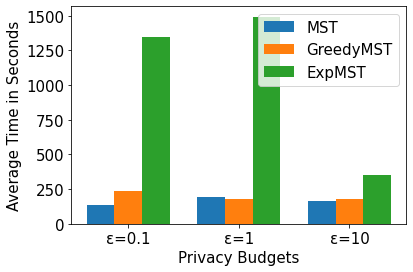

In [13]:
N = 3
ind = np.arange(N) 
width = 0.25
  
xvals = [np.mean(mst_adult_times01), np.mean(mst_adult_times1), np.mean(mst_adult_times10)]
bar1 = plt.bar(ind, xvals, width)
  
yvals = [np.mean(fair_greedy_adult_times01), np.mean(fair_greedy_adult_times1), np.mean(fair_greedy_adult_times1)]
bar2 = plt.bar(ind+width, yvals, width)
  
zvals = [np.mean(fair_opt_adult_times01), np.mean(fair_opt_adult_times1), np.mean(fair_opt_adult_times10)]
bar3 = plt.bar(ind+width*2, zvals, width)
  
plt.xlabel("Privacy Budgets")
plt.ylabel('Average Time in Seconds')
#plt.title("Title Here")
  
plt.xticks(ind+width,['ε=0.1','ε=1','ε=10'])
plt.legend( (bar1, bar2, bar3), ('MST', 'GreedyMST', 'ExpMST') )
plt.savefig(artifactspath + 'TimeAdult3.pdf', bbox_inches='tight')

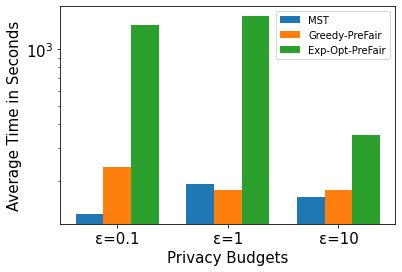

In [24]:
N = 3
plt.rcParams.update({'font.size': 15})
ind = np.arange(N) 
width = 0.25
plt.yscale("log")

xvals = [np.mean(mst_adult_times01), np.mean(mst_adult_times1), np.mean(mst_adult_times10)]
bar1 = plt.bar(ind, xvals, width)
  
yvals = [np.mean(fair_greedy_adult_times01), np.mean(fair_greedy_adult_times1), np.mean(fair_greedy_adult_times1)]
bar2 = plt.bar(ind+width, yvals, width)
  
zvals = [np.mean(fair_opt_adult_times01), np.mean(fair_opt_adult_times1), np.mean(fair_opt_adult_times10)]
bar3 = plt.bar(ind+width*2, zvals, width)
  
plt.xlabel("Privacy Budgets")
plt.ylabel('Average Time in Seconds')
#plt.title("Title Here")
  
plt.xticks(ind+width,['ε=0.1','ε=1','ε=10'])
plt.legend( (bar1, bar2, bar3), ('MST', 'Greedy-PreFair', 'Exp-Opt-PreFair'), fontsize = 10 )
plt.savefig(artifactspath + 'TimeAdult3log.pdf', bbox_inches='tight')

In [22]:
print(np.mean(fair_opt_adult_times01)/np.mean(mst_adult_times01))
print(np.mean(fair_opt_adult_times1)/np.mean(mst_adult_times1))
print(np.mean(fair_opt_adult_times10)/np.mean(mst_adult_times10))
print(np.mean(fair_opt_adult_times01))

10.05478732523472
7.76090764972497
2.1558904384739965
1344.1792452063


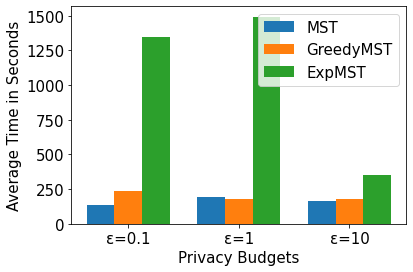

In [16]:
N = 3
ind = np.arange(N) 
width = 0.25
  
xvals = [np.mean(mst_adult_times01), np.mean(mst_adult_times1), np.mean(mst_adult_times10)]
bar1 = plt.bar(ind, xvals, width)
  
yvals = [np.mean(fair_greedy_adult_times01), np.mean(fair_greedy_adult_times1), np.mean(fair_greedy_adult_times1)]
bar2 = plt.bar(ind+width, yvals, width)
  
zvals = [np.mean(fair_opt_adult_times01), np.mean(fair_opt_adult_times1), np.mean(fair_opt_adult_times10)]
bar3 = plt.bar(ind+width*2, zvals, width)
  
plt.xlabel("Privacy Budgets")
plt.ylabel('Average Time in Seconds')
#plt.title("Title Here")
  
plt.xticks(ind+width,['ε=0.1','ε=1','ε=10'])
plt.legend( (bar1, bar2, bar3), ('MST', 'GreedyMST', 'ExpMST') )
plt.savefig(artifactspath + 'TimeAdult3.pdf', bbox_inches='tight')

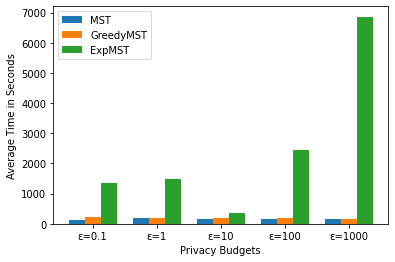

In [6]:
N = 5
ind = np.arange(N) 
width = 0.25
  
xvals = [np.mean(mst_adult_times01), np.mean(mst_adult_times1), np.mean(mst_adult_times10),np.mean(mst_adult_times100),np.mean(mst_adult_times1000)]
bar1 = plt.bar(ind, xvals, width)
  
yvals = [np.mean(fair_greedy_adult_times01), np.mean(fair_greedy_adult_times1), np.mean(fair_greedy_adult_times10), np.mean(fair_greedy_adult_times100), np.mean(fair_greedy_adult_times1000)]
bar2 = plt.bar(ind+width, yvals, width)
  
zvals = [np.mean(fair_opt_adult_times01), np.mean(fair_opt_adult_times1), np.mean(fair_opt_adult_times10), np.mean(fair_opt_adult_times100), np.mean(fair_opt_adult_times1000)]
bar3 = plt.bar(ind+width*2, zvals, width)
  
plt.xlabel("Privacy Budgets")
plt.ylabel('Average Time in Seconds')
#plt.title("Title Here")
  
plt.xticks(ind+width,['ε=0.1','ε=1','ε=10','ε=100','ε=1000'])
plt.legend( (bar1, bar2, bar3), ('MST', 'GreedyMST', 'ExpMST') )
plt.savefig(artifactspath + 'TimeAdult5.pdf', bbox_inches='tight')

# Table Gen

In [ ]:
# Insert Raw Data Here

In [ ]:
# Compute vals here